## Tasks
#### Analyse data, identify key drivers (features) for sales success (mandatory task).
#### Prepare suggestions to CFO on how to improve sales for the next year (mandatory task).
#### Predict next year's (2012-12-10 to 2013-12-10) weekly sales (task for bonus points).

## Key insights
#### Sharp increase in sales coinside with annual holiday dates.
#### Stores of type C do not show weekly sales increase connected with annual holidays as observed in type A and B stores.
#### Store-wise analysis shows that type A stores have the largest weekly sales followed by type B and type C. Overall weekly sales are directly conected with store size. However there are two type A stores (33 and 36) which have very low weekly sales. Their low weekly sale is explained by their small store size (stores 33 and 36 are among the smallest).
#### Size-wise sale efficiency (i.e. weekly sales per store size) of the stores 33 and 36 are not the lowest. 
#### The smallest stores (type C) are among the most efficient (size-wise) performing stores.
#### Type A and B store year-to-year sales are slightly declining, while type C store sales remain constant.
#### Total Markdowns in stores of type A and B have small positive impact on Weekly Sales increase.  Markdowns in stores of type C have medium positive impact on Weekly Sales increase. 
#### In stores of type A and B Markdown3 increases Weekly sales the most of all MarkDowns. In stores of type C there are three successful Markdowns: 1, 3 and 5. 
#### Out of five of the best performing departments in all stores, two departments (38 and 95) coincide in all three store types. In type C stores, departments 92, 38, and 95 each generate more than 1/10th of total weekly sale.
#### Departments 47 and 71 generate losses (negative sales) from 2010 from 2012 in Type B and Type C stores, respectively.
#### 
## Suggestions on improving sales for the next year
#### Improve MarkDowns policy in stores type A and B. At the moment Markdowns do not show large impact on weekly sales.
#### Use MarkDown3 and stores type C as more successfull example on sale improvement.
#### If possible, try to apply efficient management model of stores 10 (type B) and 43 (type C) to other stores.

### Data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels.api as sm

#### Import data and check the first five rows.

In [2]:
path = 'C:\\DARBAI\\Forecasting FuturePros\\'
features = pd.read_csv(path + 'features.csv', parse_dates=['Date'])
sales = pd.read_csv(path + 'sales.csv', parse_dates=['Date'])
stores = pd.read_csv(path + 'stores.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Check for duplicated entries.

In [6]:
dupl_features = features[features.duplicated()]
dupl_sales = sales[sales.duplicated()]
dupl_stores = stores[stores.duplicated()]
print('Number of duplicate rows in Features: ', dupl_features.shape[0],
     '\nNumber of duplicate rows in Sales: ', dupl_sales.shape[0],
     '\nNumber of duplicate rows in Stores: ', dupl_stores.shape[0])

Number of duplicate rows in Features:  0 
Number of duplicate rows in Sales:  0 
Number of duplicate rows in Stores:  0


#### Check for null values in Features.

In [7]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#### Empty MarkDown columns are expected as discounts usually have finite start/end dates. 
#### Check where are missing values of CPI and Unemployment.

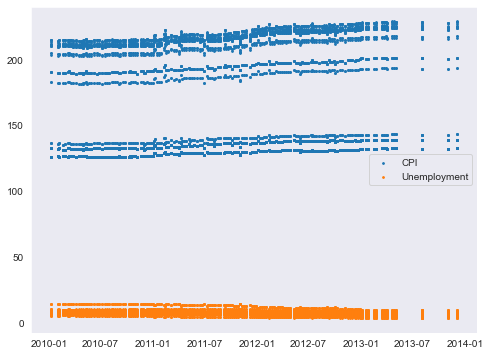

In [8]:
cols = ['CPI', 'Unemployment']
sns.set_style("dark")
plt.subplots(figsize=(8,6))
for col in cols:
    plt.scatter(features['Date'], features[col], label=col, s=3)
plt.legend()    
plt.show()

In [9]:
unmpl_null = features[features['Unemployment'].isnull()]
unmpl_null.sort_values(by='Date').head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-03-05,66.66,3.386,2298.63,2.0,129.90,55.46,1301.04,NaN,NaN,False
7631,42,2013-03-05,78.41,3.671,97.72,NaN,21.53,NaN,2697.25,NaN,NaN,False
715,4,2013-03-05,64.18,3.369,13789.79,14.0,218.21,7299.53,8146.91,NaN,NaN,False
2899,16,2013-03-05,41.41,3.573,1006.27,NaN,13.21,542.17,662.68,NaN,NaN,False
4719,26,2013-03-05,47.30,3.601,7326.63,25.0,39.14,2263.34,2205.99,NaN,NaN,False


In [10]:
CPI_null = features[features['CPI'].isnull()]
CPI_null.sort_values(by='Date').head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-03-05,66.66,3.386,2298.63,2.0,129.90,55.46,1301.04,NaN,NaN,False
7631,42,2013-03-05,78.41,3.671,97.72,NaN,21.53,NaN,2697.25,NaN,NaN,False
715,4,2013-03-05,64.18,3.369,13789.79,14.0,218.21,7299.53,8146.91,NaN,NaN,False
2899,16,2013-03-05,41.41,3.573,1006.27,NaN,13.21,542.17,662.68,NaN,NaN,False
4719,26,2013-03-05,47.30,3.601,7326.63,25.0,39.14,2263.34,2205.99,NaN,NaN,False


#### Missing values for both columns start only at 2013-03-05. The date is out of range for the task. Empty values will be ignored (otherwise gaps can be filled by forward fill method). 

#### Check for null values in Sales.

In [11]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

#### Check for null values in Stores.

In [12]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

#### Data sets are ready for analysis. 

### Exploratory Data Analysis (EDA)

#### Join datasets.

In [13]:
full_df = features.merge(sales, on=['Store','Date', 'IsHoliday'], how='left')
full_df = pd.merge(full_df, stores, on=['Store'], how='left')

#### Subset data until current date 2012-12-10.

In [14]:
full_df = full_df[(full_df['Date'] <= '2012-12-10')]
full_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423287,45,2012-09-11,41.20,3.771,2605.32,13041.23,17.84,640.33,2016.71,192.264988,8.667,False,NaN,NaN,B,118221
423288,45,2012-11-16,45.61,3.750,18700.38,499.75,28.20,1800.78,10303.93,192.261619,8.667,False,NaN,NaN,B,118221
423289,45,2012-11-23,43.08,3.748,1005.79,NaN,72542.01,484.70,620.12,192.283032,8.667,True,NaN,NaN,B,118221
423290,45,2012-11-30,37.43,3.729,2298.55,NaN,2908.54,100.86,1344.84,192.304445,8.667,False,NaN,NaN,B,118221


In [15]:
full_df.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270890
MarkDown2       310426
MarkDown3       284499
MarkDown4       286642
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept               270
Weekly_Sales       270
Type                 0
Size                 0
dtype: int64

#### After merging datasets there are 270 null values in Weekly_sales column. It is a small fraction compared with all dataset thus these rows will be droped.

In [16]:
full_df = full_df.dropna(subset=['Weekly_Sales'])

In [17]:
full_df.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

#### Find sum of weekly sales of all stores.

In [18]:
df_weekly_sales = full_df.groupby(['Date', 'IsHoliday'], as_index=False).agg({'Weekly_Sales': 'sum'})

In [19]:
df_weekly_sales.head()

,Date,IsHoliday,Weekly_Sales
0,2010-01-10,False,42239875.87
1,2010-02-04,False,50423831.26
2,2010-02-07,False,48917484.50
3,2010-02-19,False,48276993.78
4,2010-02-26,False,43968571.13


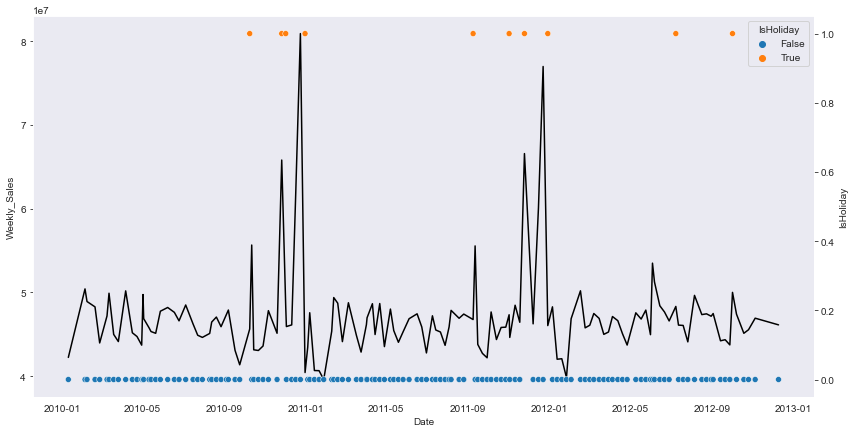

In [20]:
plt.subplots(figsize=(14,7))
sns.lineplot(data=df_weekly_sales, x='Date', y='Weekly_Sales', color="k")
ax2 = plt.twinx()
sns.scatterplot(data=df_weekly_sales, x='Date', y='IsHoliday', hue='IsHoliday', ax=ax2)
plt.show()

#### Sharp increase in sales coinside with holiday dates.

#### Find which store performed on overall the best. 

In [21]:
sum_stores = full_df.groupby(['Store', 'Type'], as_index=False).agg({'Weekly_Sales':'sum'})

In [22]:
sum_stores['SalesPerSize'] = sum_stores['Weekly_Sales']/stores['Size']
sum_stores = sum_stores.sort_values(by='Weekly_Sales', ascending=False)

In [23]:
sum_stores.reset_index(drop=True).head()

,Store,Type,Weekly_Sales,SalesPerSize
0,20,A,3.013978e+08,1479.311053
1,4,A,2.995440e+08,1455.064550
2,14,A,2.889999e+08,1438.540510
3,13,A,2.865177e+08,1304.594730
4,2,A,2.753824e+08,1361.210640


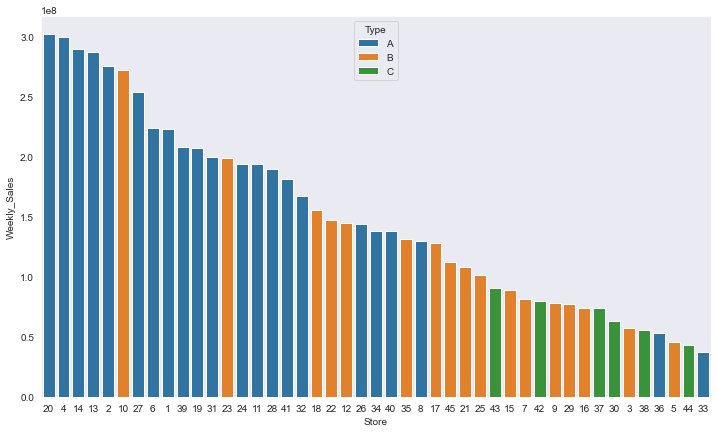

In [24]:
plt.subplots(figsize=(12,7))
sns.barplot(data=sum_stores, x='Store', y='Weekly_Sales', hue='Type', order=sum_stores['Store'], dodge=False)
plt.show()

#### Type A stores have the largest weekly sales followed by type B and type C. Overall weekly sales are directly conected with store size. However there are two type A stores (33 and 36) which have very low weekly sales.

#### Display store size distribution by type.

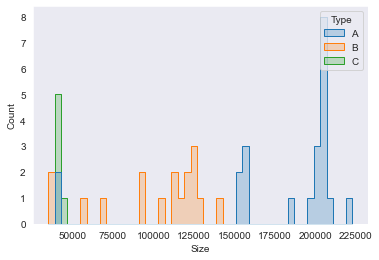

In [25]:
sns.histplot(data=stores, x='Size', hue='Type', binwidth=4000, element="step")
plt.show()

In [26]:
stores[stores['Size']<40000].sort_values(by='Size').reset_index(drop=True)

,Store,Type,Size
0,5,B,34875
1,3,B,37392
2,33,A,39690
3,38,C,39690
4,42,C,39690
5,36,A,39910
6,37,C,39910
7,44,C,39910


#### It appears that A type stores 33 and 36 are among the smallest. This explains their low weekly sales.

#### Assuming that larger stores cost more to maintain, let's evaluate store sale efficency (weekly sales per stores size). 

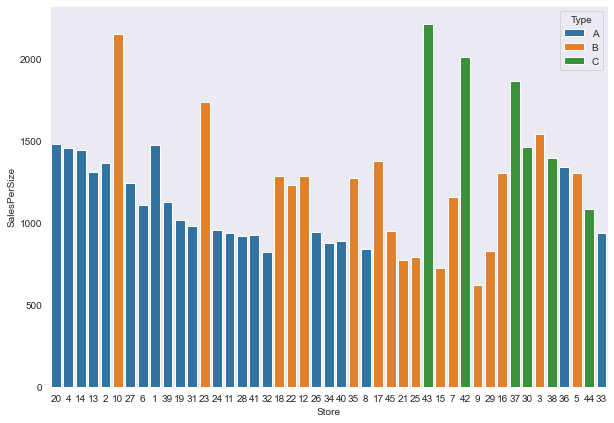

In [27]:
plt.subplots(figsize=(10,7))
sns.barplot(data=sum_stores, x='Store', y='SalesPerSize', hue='Type', order=sum_stores['Store'], dodge=False)
plt.show()

#### Size-wise efficiency of the stores 33 and 36 are not the lowest. 

In [28]:
eff_stores = sum_stores.sort_values(by='SalesPerSize', ascending=False)
eff_stores = eff_stores.reset_index(drop=True)
print('Top ten of the MOST efficient (size-wise) stores:\n', eff_stores[['Store','Type']].head(10))
print('\nTop ten of the LEAST efficient (size-wise) stores:\n', eff_stores[['Store','Type']].tail(10))

Top ten of the MOST efficient (size-wise) stores:
    Store Type
0     43    C
1     10    B
2     42    C
3     37    C
4     23    B
5      3    B
6     20    A
7      1    A
8     30    C
9      4    A

Top ten of the LEAST efficient (size-wise) stores:
     Store Type
35     28    A
36     40    A
37     34    A
38      8    A
39     29    B
40     32    A
41     25    B
42     21    B
43     15    B
44      9    B


#### The smallest stores (type C) are among the most efficient (size-wise) performing stores.

#### Compare total sales of each store type by year.

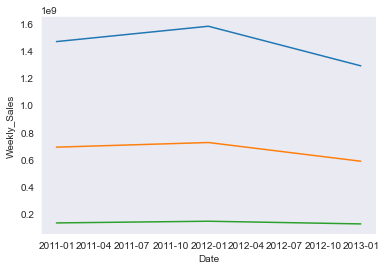

In [29]:
types = ['A', 'B', 'C']
date_df = full_df.set_index(['Date'])
for t in types:
    year = date_df[date_df['Type']==t].groupby([pd.Grouper(freq='Y'), 'Type']).agg({'Weekly_Sales':'sum'})
    #print(t, year)
    g=sns.lineplot(data=year, x='Date', y='Weekly_Sales')    

#### Type A and B store sales are declining, while type C store sales remains constant.

#### How does Markdowns affect Weekly Sales in each store type? First look at the total Markdowns.

Correaltion between Sales and Total MarkDown in type A:
                Weekly_Sales  TotalMarkDown
Weekly_Sales       1.000000       0.120876
TotalMarkDown      0.120876       1.000000


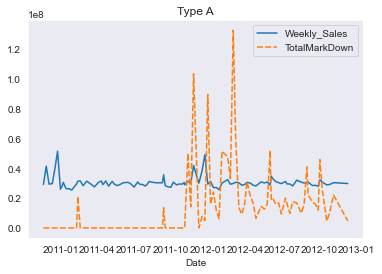

Correaltion between Sales and Total MarkDown in type B:
                Weekly_Sales  TotalMarkDown
Weekly_Sales       1.000000       0.141971
TotalMarkDown      0.141971       1.000000


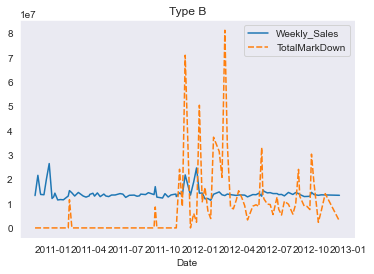

Correaltion between Sales and Total MarkDown in type C:
                Weekly_Sales  TotalMarkDown
Weekly_Sales       1.000000       0.306115
TotalMarkDown      0.306115       1.000000


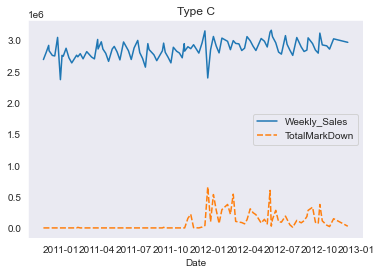

In [30]:
types = ['A', 'B', 'C']
features_dict = {'Weekly_Sales':'sum', 'MarkDown1':'sum', 'MarkDown2':'sum', 
                 'MarkDown3':'sum', 'MarkDown4':'sum', 'MarkDown5':'sum'}
for t in types:
    type_weekly_sales = full_df[full_df['Type']==t].groupby(['Date'], as_index=False).agg(features_dict)
    type_weekly_sales['TotalMarkDown']= type_weekly_sales.iloc[:, 2:6].sum(axis=1)
    type_weekly_sales = type_weekly_sales[(type_weekly_sales['Date'] >= '2010-11-11')].set_index('Date')
    type_weekly_sales = type_weekly_sales.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
    g = sns.lineplot(data=type_weekly_sales)
    g.set_title('Type {}'.format(t))
    print('Correaltion between Sales and Total MarkDown in type {}:\n'.format(t), type_weekly_sales.corr())
    plt.show()

#### Total Markdowns in stores of type A and B have small positive impact on Weekly Sales increase.  Markdowns in stores of type C have medium positive impact on Weekly Sales increase. 
#### On a side note, stores of type C do not show Weekly sales increase connected with annual holidays as observed in type A and B.

#### Which Markdown has the largest impact on Weekly Sales?

Correaltion between Sales and MarkDowns in type A:



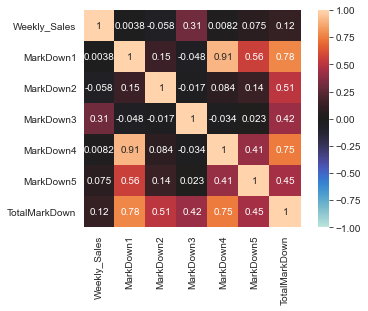

Correaltion between Sales and MarkDowns in type B:



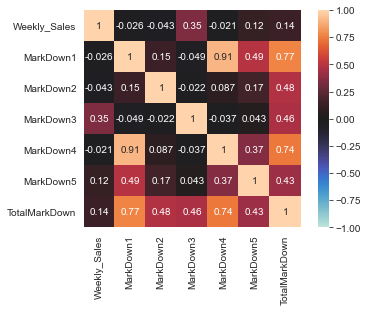

Correaltion between Sales and MarkDowns in type C:



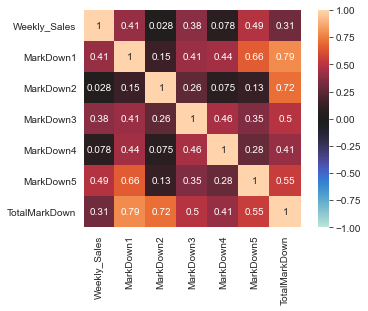

In [31]:
for t in types:
    type_weekly_sales = full_df[full_df['Type']==t].groupby(['Date'], as_index=False).agg(features_dict)
    type_weekly_sales['TotalMarkDown']= type_weekly_sales.iloc[:, 2:6].sum(axis=1)
    type_weekly_sales = type_weekly_sales[(type_weekly_sales['Date'] >= '2010-11-11')]
    print('Correaltion between Sales and MarkDowns in type {}:\n'.format(t))#,type_weekly_sales.corr())
    sns.heatmap(type_weekly_sales.corr(), annot=True, vmin=-1, vmax=1, center= 0, square=True)
    plt.show()

#### In stores of type A and B Markdown3 increases Weekly sales the most. In stores of type C there are three successful Markdowns: 1, 3 and 5. 

#### Which department generates the largest weekly sales? Sort departments by total generated sales in each store type.


Top departments in type A
    Dept  Weekly_Sales
0  92.0  3.528455e+08
1  95.0  3.054578e+08
2  90.0  2.219519e+08
3  38.0  2.045058e+08
4  72.0  1.785082e+08

Worst departments in type A
     Dept  Weekly_Sales
76  51.0      17517.64
77  47.0       1926.03
78  78.0       1093.47
79  39.0        149.98
80  43.0          2.82

Top departments in type B
    Dept  Weekly_Sales
0  38.0  1.417301e+08
1  72.0  1.271272e+08
2   2.0  1.046594e+08
3  40.0  1.029907e+08
4  95.0  1.004119e+08

Worst departments in type B
     Dept  Weekly_Sales
75  78.0        621.24
76  99.0        308.60
77  39.0         28.00
78  43.0         11.50
79  47.0      -6888.96

Top departments in type C
    Dept  Weekly_Sales
0  92.0   52162761.54
1  38.0   46882211.29
2  95.0   43450462.66
3  90.0   37433022.26
4  94.0   27143838.06

Worst departments in type C
     Dept  Weekly_Sales
61  29.0        211.33
62  99.0        174.95
63  35.0          7.00
64  19.0          2.38
65  71.0       -517.65


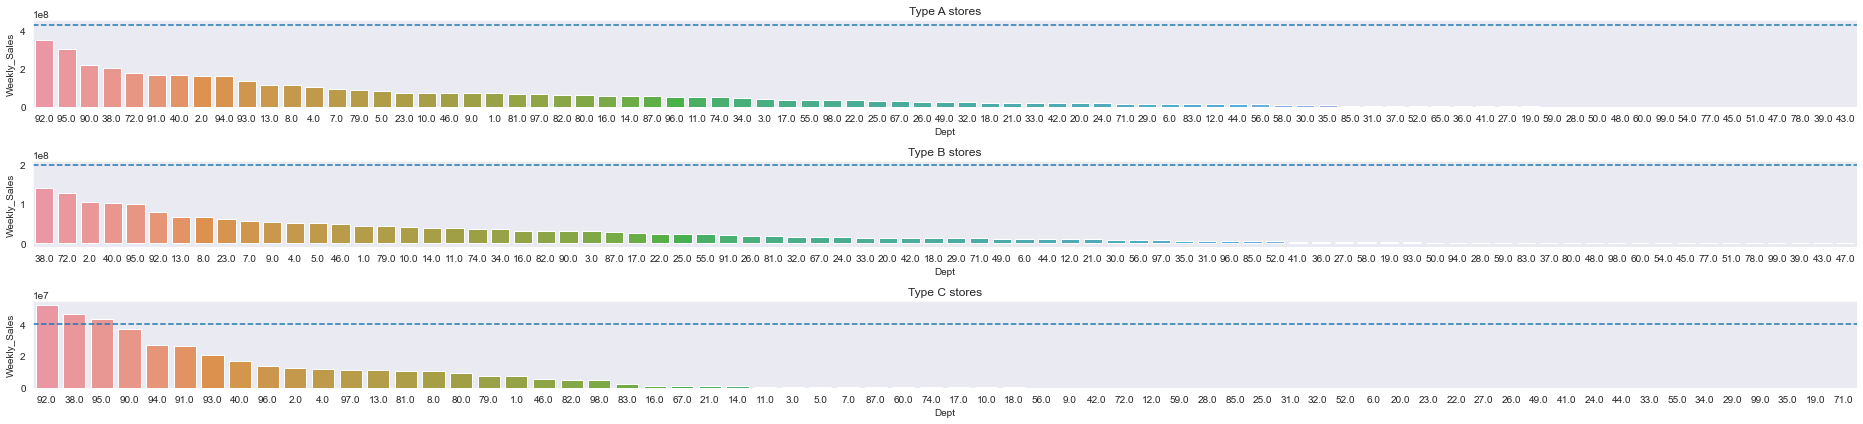

In [32]:
plt.subplots(3,1,figsize=(26,6))
i=0
for t in types:
    i+=1
    sales_dept = full_df[full_df['Type']==t].groupby(['Dept'], as_index=False).agg({'Weekly_Sales':'sum'})
    sales_dept = sales_dept.sort_values(by='Weekly_Sales', ascending=False).reset_index(drop=True)
    plt.subplot(3,1,i)
    g = sns.barplot(data=sales_dept, x='Dept', y='Weekly_Sales', dodge=False, order=sales_dept['Dept'])
    g.set_title('Type {} stores'.format(t))
    tenth_sales = sum_stores[sum_stores['Type']==t]['Weekly_Sales'].sum()/10
    g.axhline(tenth_sales, ls='--')
    print('\nTop departments in type {}\n'.format(t), sales_dept.iloc[:5])
    print('\nWorst departments in type {}\n'.format(t), sales_dept.iloc[-5:])
plt.tight_layout()
plt.show()

#### Out of five of the best performing departments two departments (38 and 95) coincide in all three store types. In type C stores, departments 92, 38, and 95 each generate more than 1/10th of total weekly sale.
#### Departments 47 and 71 generate losses (negative sales) in Type B and Type C stores, respectively.

### Prediction using fbprophet
#### Prophet is a procedure for forecasting time series data based on an additive model.

In [33]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [34]:
df_weekly_sales.drop('IsHoliday', axis=1, inplace=True)

In [35]:
df_weekly_sales = df_weekly_sales.rename(columns = {'Date':'ds', 'Weekly_Sales':'y'})
df_weekly_sales.head() 

,ds,y
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [36]:
m = Prophet(daily_seasonality=True)
m.fit(df_weekly_sales)

In [37]:
dates2013 = pd.date_range('20121210','20131210', freq='W')

In [38]:
future = pd.DataFrame(dates2013, columns=['ds'])

In [39]:
forecast = model.predict(future)

NameError: name 'model' is not defined

In [ ]:
fig = model.plot(forecast)
ax = fig.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.show()